## Exploratory Data Analysis
In the following cells, we will begin with exploring our dataset. 

In [31]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
from data.Functions import data_processing

import warnings
warnings.filterwarnings('ignore')

In [19]:
# reading data file
df = pd.read_csv('data/ml_gw_car_insurance.csv')
df.head()

,Unnamed: 0,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,...,No,No,No,Yes,No,No,No,Yes,0,0.0
1,1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,...,No,No,No,Yes,No,No,No,Yes,0,0.0
2,2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,...,No,No,No,Yes,No,No,No,Yes,0,0.0
3,3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


#### Cleaning the data

In [20]:
#Transforming Yes and No values into Booleans
df = df.replace({ "No" : 0 , "Yes" : 1 })

#Removal of policy_id column
df.drop(columns = {"policy_id", 'Unnamed: 0'}, inplace = True)

# only considering rows where target variable is not nan
df = df[(df.is_claim == 1) | (df.is_claim == 0)]

df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,0,0,0,1,0,0,0,1,0,0.0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,0,0,0,1,0,0,0,1,0,0.0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,0,0,0,1,0,0,0,1,0,0.0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,1,1,1,1,1,1,1,1,2,0.0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,0,1,1,1,0,1,1,1,2,0.0


In [21]:
# Cleaning the max_torque and max_power columns
def data_preprocessor(df):

    #Clean max_torque and max_power cols
    df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
    
    df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    #Drop original cols
    df.drop(["max_torque","max_power"],axis=1,inplace=True)
    
data_preprocessor(df)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,...,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,...,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,...,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,...,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,...,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 58591
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  int64  
 11  is_esc                            58592 non-null  int64  
 12  is_a

#### Univariate Analysis

In [25]:
df['airbags']=df['airbags'].astype('object')
df['cylinder']=df['cylinder'].astype('object')
df['gear_box']=df['gear_box'].astype('object')
df['ncap_rating']=df['ncap_rating'].astype('object')
df['is_claim']=df['is_claim'].astype('object')

In [28]:
cat = df.select_dtypes(include=object).columns
cat

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type',
       'airbags', 'rear_brakes_type', 'cylinder', 'transmission_type',
       'gear_box', 'steering_type', 'ncap_rating', 'is_claim'],
      dtype='object')

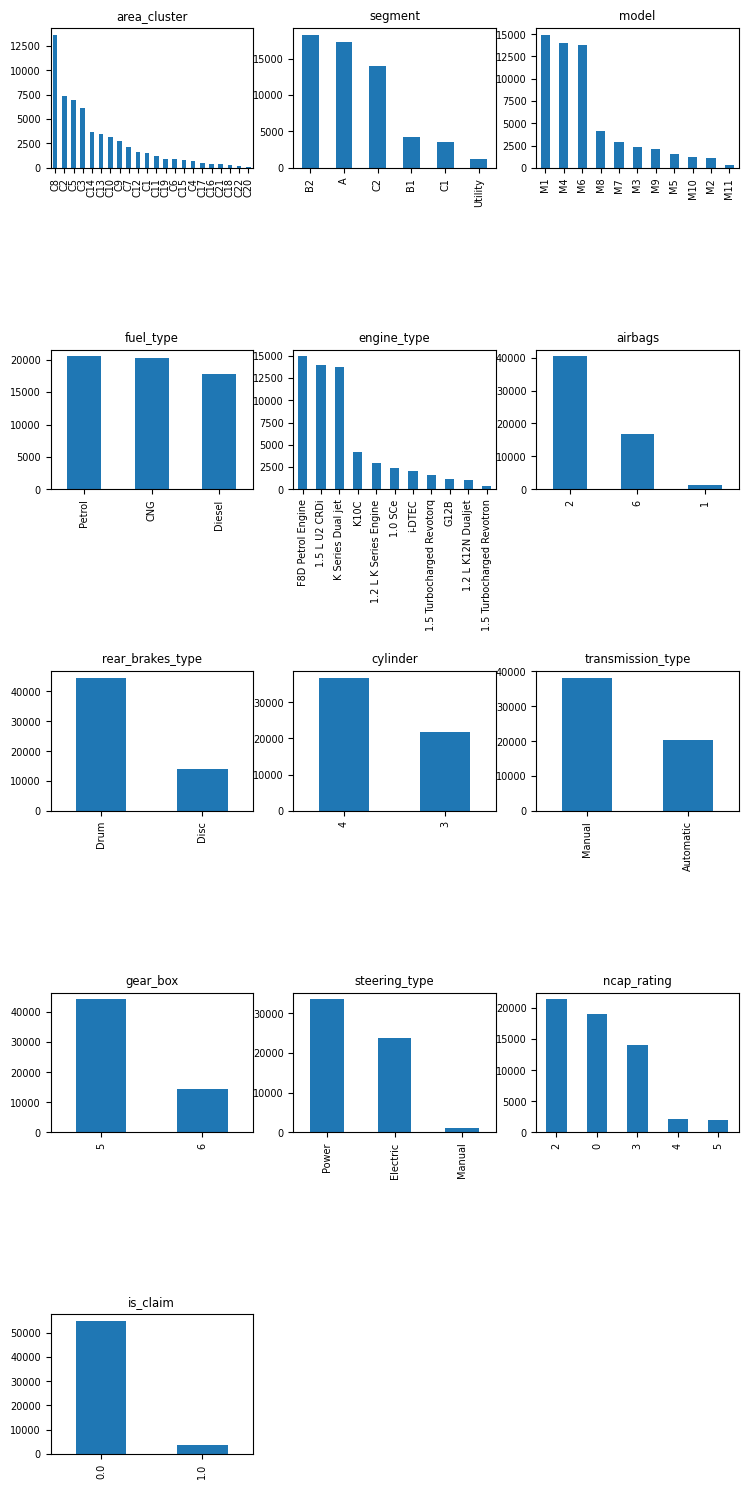

In [39]:
plt.rcParams.update({'font.size': 7})
row = 14
col = 3
iterator=1
for i in  cat:
    plt.subplots_adjust(left=None, bottom=1, right=1.2, top=10, wspace=None, hspace=1.3)
    plt.subplot(row,col,iterator)
    df[i].value_counts().plot(kind='bar')
    plt.title(i)
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [40]:
num = df.select_dtypes(include=np.number).columns
num

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'displacement',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'max_torque_Nm', 'max_torque_rpm',
       'max_power_bhp', 'max_power_rpm'],
      dtype='object')

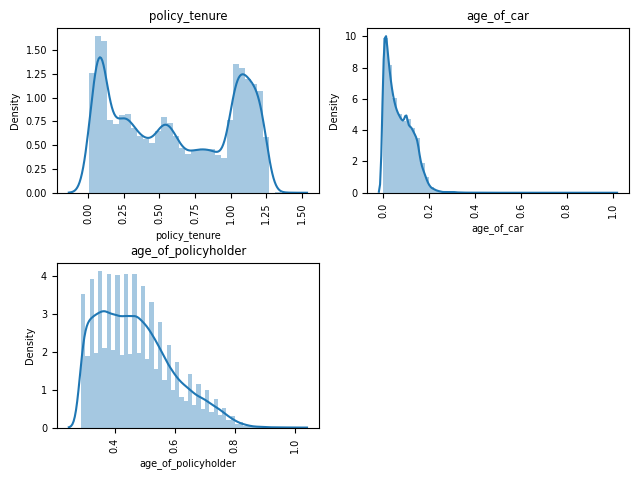

In [41]:
n = ['policy_tenure', 'age_of_car', 'age_of_policyholder']
rows = 2
columns = 2
iterator = 1

for i in n:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df[i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

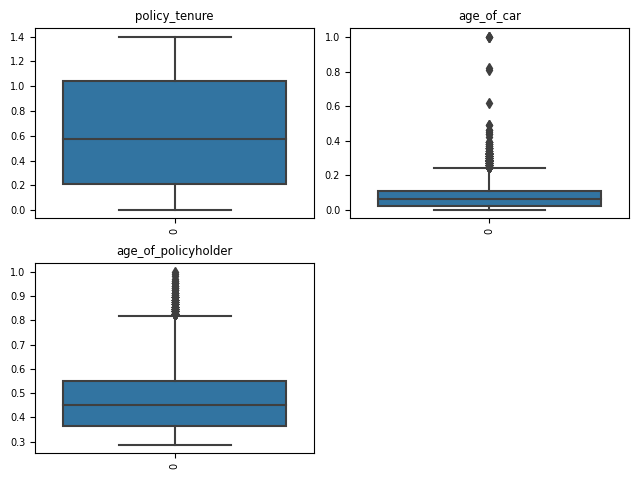

In [42]:
n=['policy_tenure', 'age_of_car', 'age_of_policyholder']
rows = 2
col = 2
iterator=1

for i in n:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(df[i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

#### Bivariate Analysis

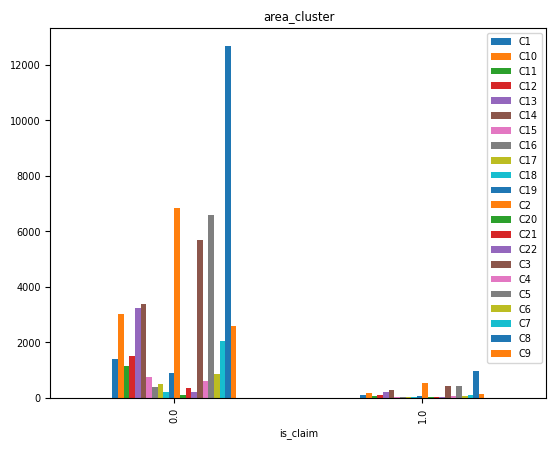

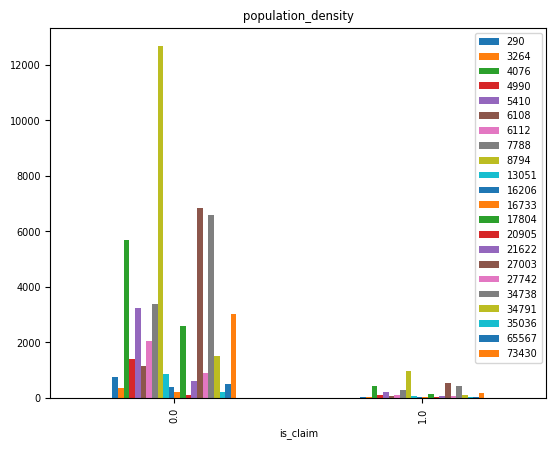

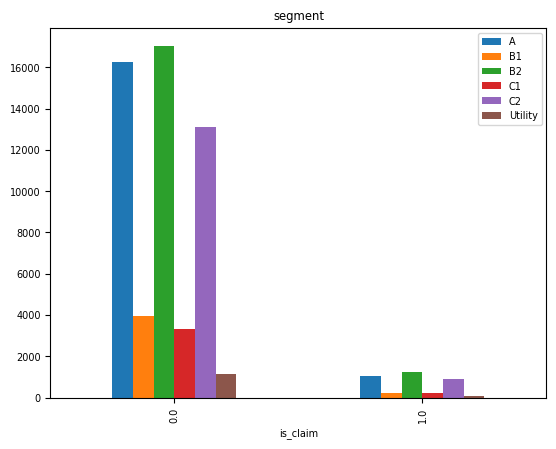

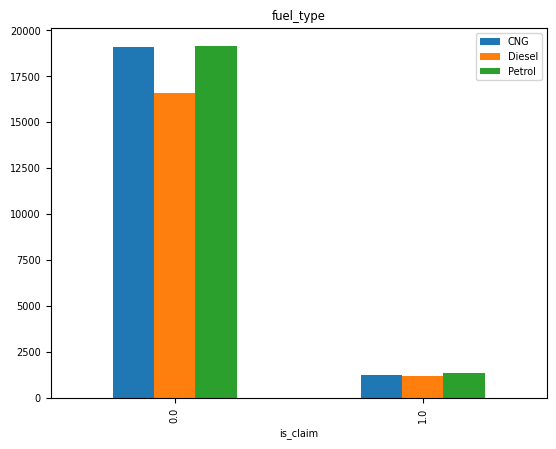

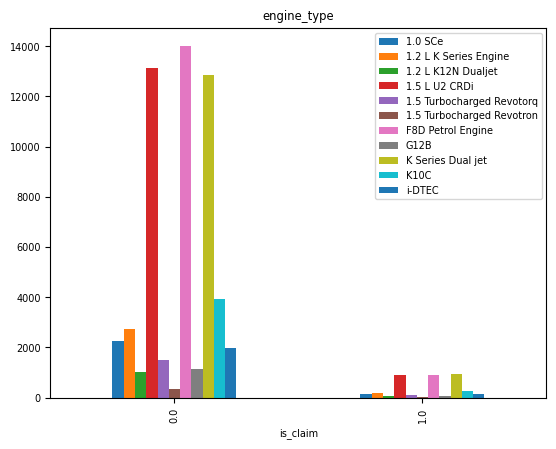

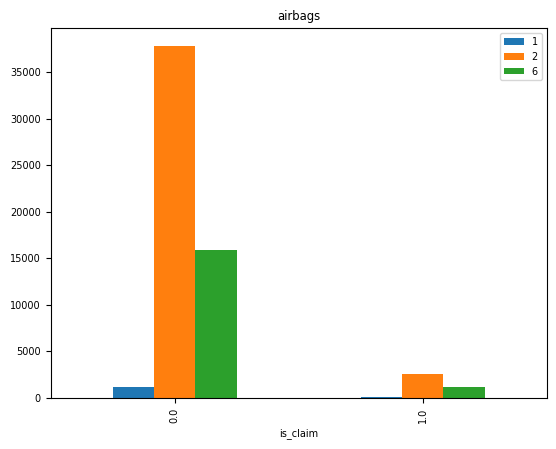

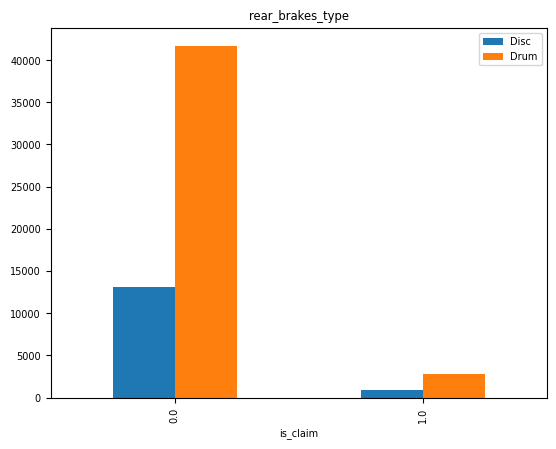

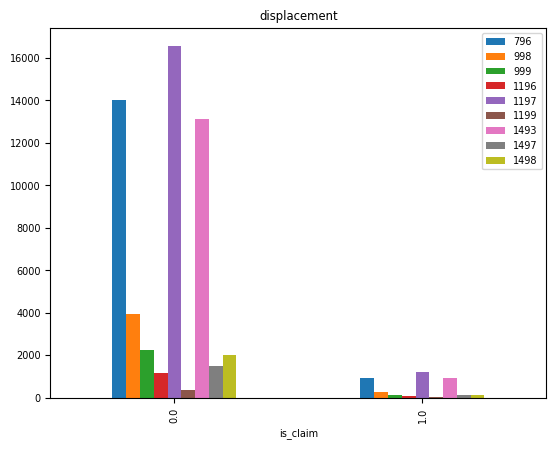

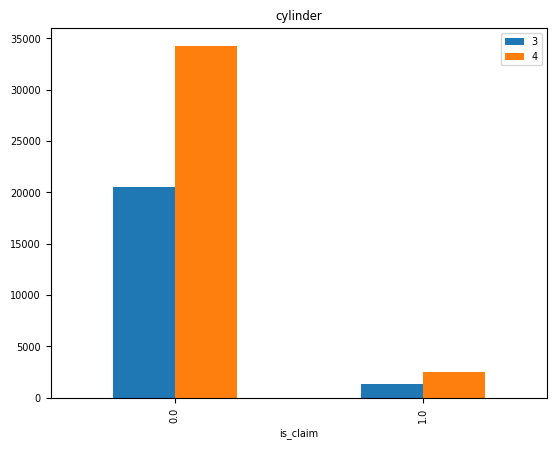

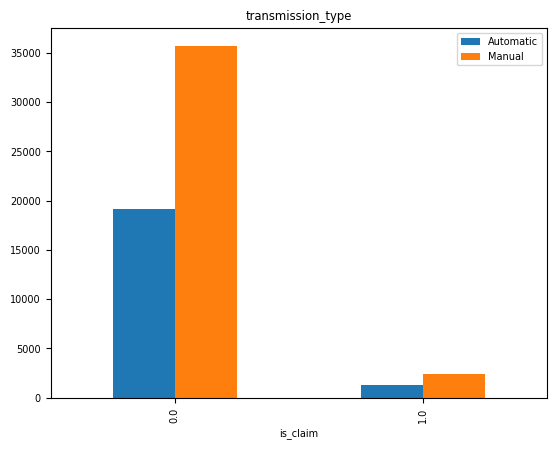

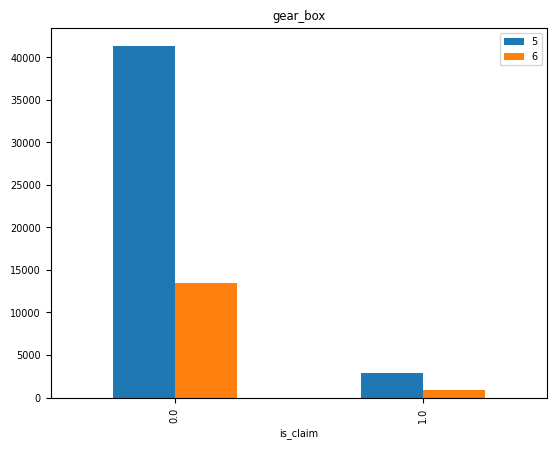

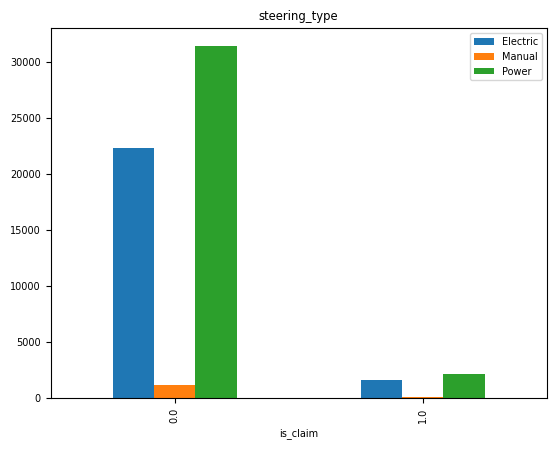

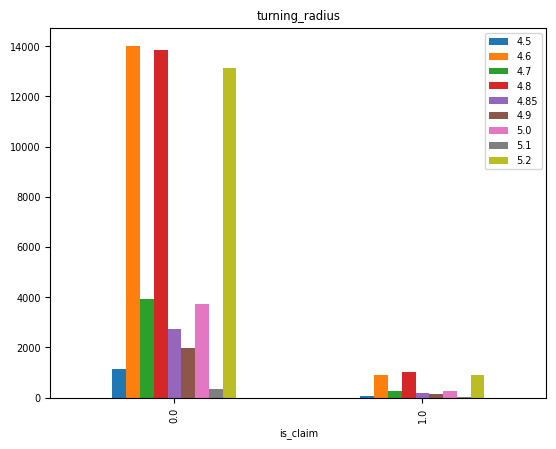

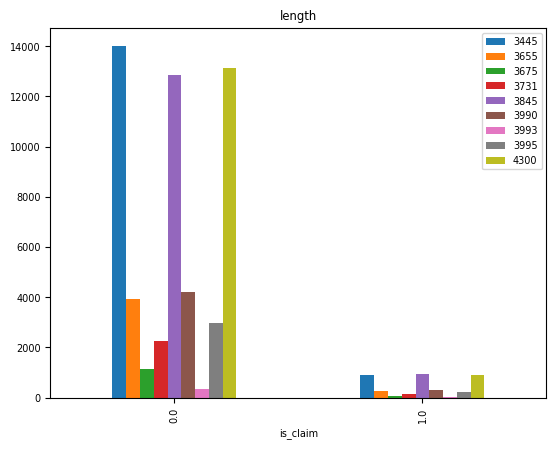

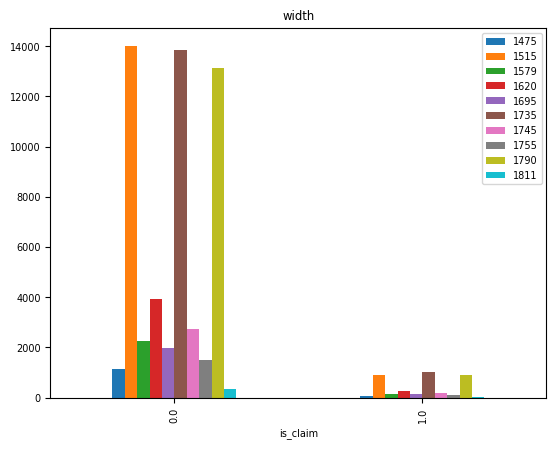

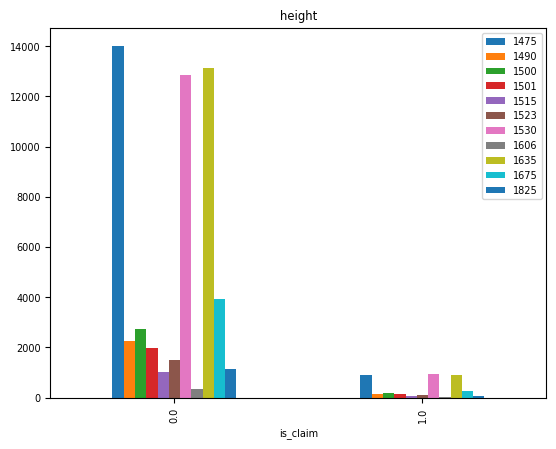

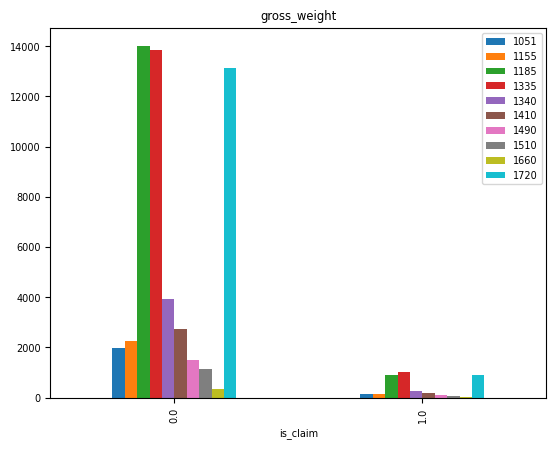

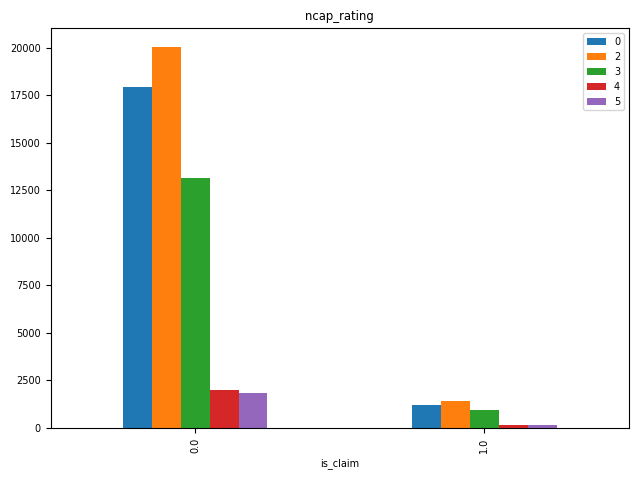

In [53]:
lls = ['area_cluster', 'population_density', 'segment','fuel_type', 'engine_type', 
       'airbags','rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 
       'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 
       'gross_weight','ncap_rating']

for i in lls:
    pd.crosstab(df.is_claim,df[i]).plot(kind='bar')
    plt.title(i)
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#### Multivariate Analysis

<AxesSubplot: >

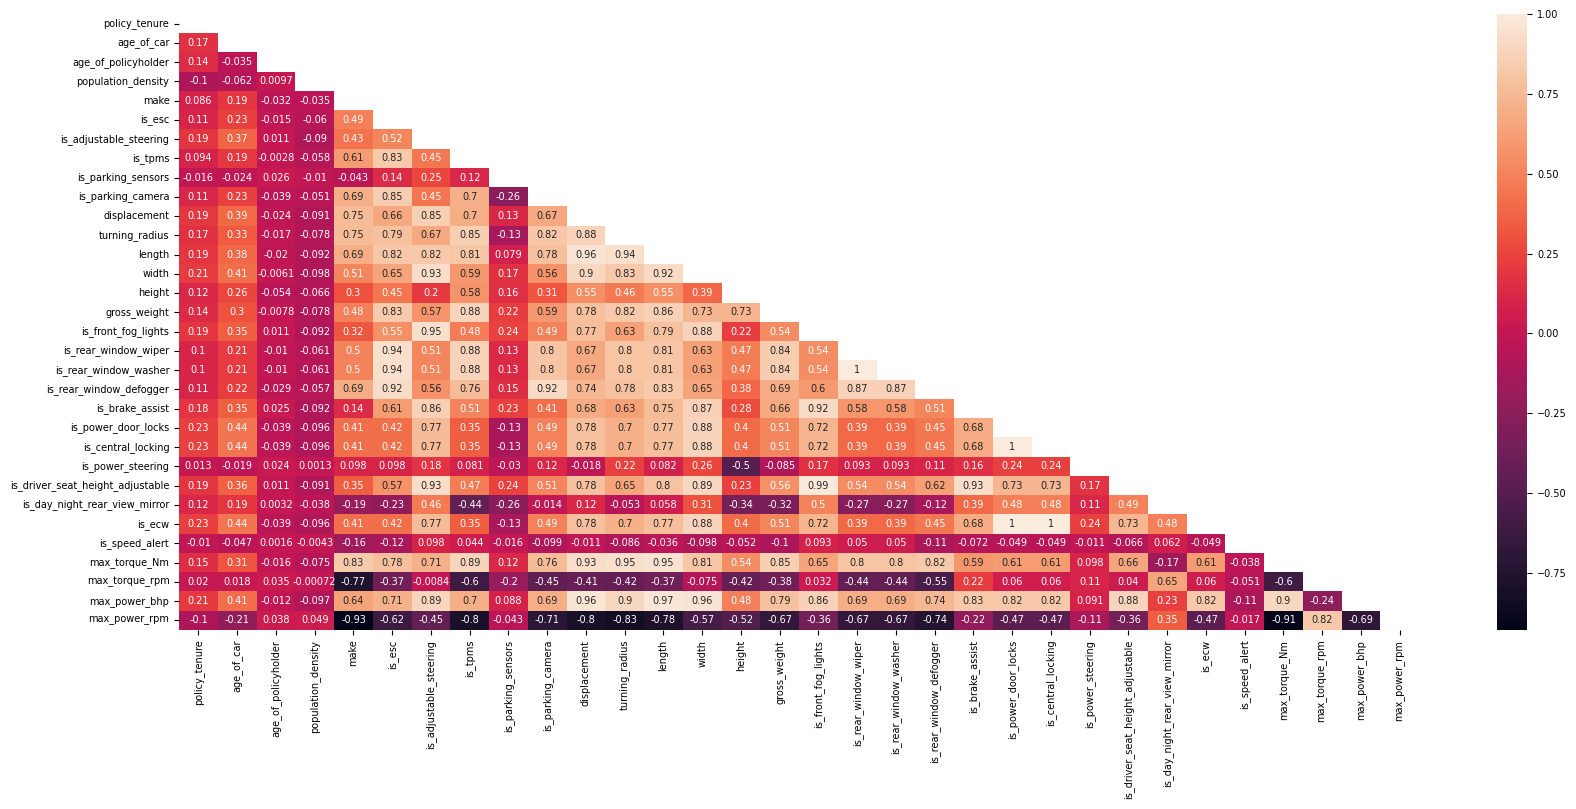

In [57]:
# correlation matrix
corr = df.corr()

# creating a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# plotting heatmap
plt.figure(figsize = (20,8))
sns.heatmap(corr, annot = True, mask = mask)

#### Is our Y-Value imbalanced?

In [43]:
df.is_claim.value_counts()/df.shape[0] * 100

0.0    93.603222
1.0     6.396778
Name: is_claim, dtype: float64

The result indicates that the dataset is highly unbalanced, with one class being much more prevalent than the other.

This unbalanced distribution can have a significant impact on the performance of models trained on our data. If we train a classifier on this dataset without accounting for the class imbalance, it may be biased towards the majority class and perform poorly on the minority class.

Therefore, it is important to consider this class imbalance when we build our models on the dataset. There are several techniques that can be used to address class imbalance, such as resampling methods (e.g. oversampling the minority class or undersampling the majority class), or using specialized algorithms that are designed to handle imbalanced datasets.

In [45]:
print(f'For building our model, we should use the following class weight: {round(93.603222/6.396778, 0)}')

For building our model, we should use the following class weight: 15.0


By including these steps in our EDA, we effectively explored, analyzed, and interpreted our data to gain valuable insights, and to now try out different machine learning models to make data-driven decisions.